In [3]:
from foxsisim.module import Module
from foxsisim.detector import Detector
from foxsisim.source import Source
from foxsisim.plotting import scatterHist
from foxsisim.plotting import plot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [4]:
module = Module(radii=[5.151],
                seglen=30.0,
                base=[0,0,0],
                focal=200,
                angles=None,
                conic=False,
                core_radius=2.856)#2.856

detector = Detector(width=3.96,#0.96 
                    height=3.96,#0.96
                    normal=[0,0,1],
                    center=[0,0,230.0],
                    reso =[128,128])
source_distance = -2187.5
offaxis_angle_arcmin = 0.0

#source = Source(type='point',
#                center=[ source_distance * np.sin(np.deg2rad(offaxis_angle_arcmin/60.0)) , 0.0 , source_distance ]
#                )

source = Source(type='atinf',          
                center=[ source_distance * np.sin(np.deg2rad(offaxis_angle_arcmin/60.0)) , 0.0 , -10 ],
                color=[0,1,1],
                width=15,
                height=15)

rays = source.generateRays(module.targetFront, 30000)
module.passRays(rays, robust=True)
detector.catchRays(rays)

/Users/Kamilobu/Desktop/foxsi-optics-sim/src/foxsisim/detector.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  colorSum[ypix, xpix, :] += ray.tag.colorAtPoint([ray.src]).astype(int)
/Users/Kamilobu/Desktop/foxsi-optics-sim/src/foxsisim/detector.py:152: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[ypix, xpix] += 1


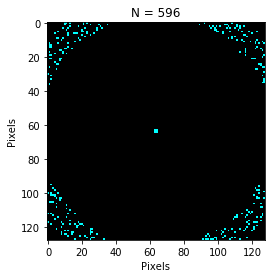

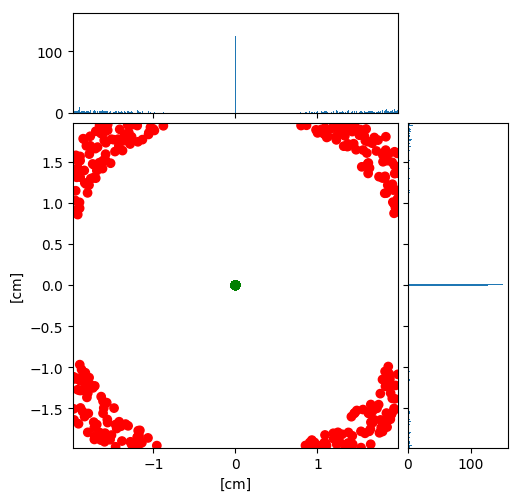

In [5]:
plot(detector)
scatterHist(detector.rays)
plt.show()

In [6]:
x = [ray.des[0] for ray in detector.rays]
y = [ray.des[1] for ray in detector.rays]
ang = [ray.ang for ray in detector.rays]
plt.scatter(x, y, c=ang, cmap = cm.jet)
plt.colorbar()

AttributeError: 'Ray' object has no attribute 'ang'

In [ ]:
x = [ray.hist[1][0] for ray in detector.rays]
y = [ray.hist[1][1] for ray in detector.rays]
ang = [ray.ang for ray in detector.rays]
plt.scatter(x, y, c=ang, cmap = cm.jet)
plt.colorbar()

In [ ]:
n = 1000
distance = 20000.
shell_radius = 200.
max_phi = np.arcsin(shell_radius/distance)
print(max_phi)
theta = np.random.rand(n) * 2 * np.pi
phi = np.arcsin(np.sqrt(np.random.rand(n))*shell_radius/distance)

In [ ]:
plt.scatter(np.rad2deg(theta), np.rad2deg(phi))

In [ ]:
x = distance * np.sin(phi) * np.sin(theta)
y = distance * np.sin(phi) * np.cos(theta)

In [ ]:
plt.scatter(x, y)